**Libraries**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle

**Genetic Algorithms**

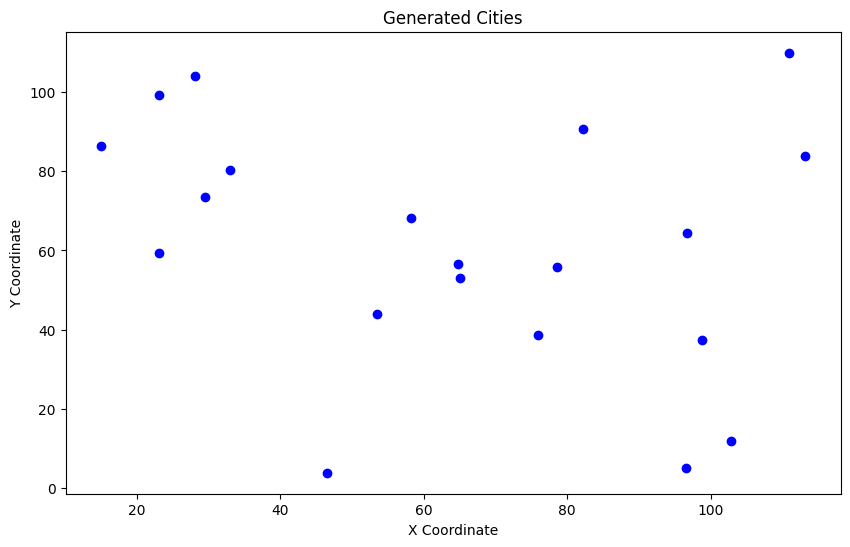

In [11]:
# Number of cities
num_cities = 20

cities = np.random.rand(num_cities, 2) * 120

# Function to calculate the distance matrix between cities
def calculate_distance_matrix(cities):
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            dist_matrix[i][j] = np.linalg.norm(cities[i] - cities[j])
            dist_matrix[j][i] = dist_matrix[i][j]
    return dist_matrix

distance_matrix = calculate_distance_matrix(cities)

plt.figure(figsize=(10, 6))

plt.scatter(cities[:, 0], cities[:, 1], c='blue')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Generated Cities')

plt.show()



Running Genetic Algorithm on the generated dataset...
Generation 1: Best Distance = 871.8563011146764
Generation 10: Best Distance = 631.2296739912973
Generation 20: Best Distance = 564.2113723702827
Generation 30: Best Distance = 527.7741022279617
Generation 40: Best Distance = 508.38865215985703
Generation 50: Best Distance = 508.38865215985703
Generation 60: Best Distance = 473.328865343718
Generation 70: Best Distance = 473.3288653437179
Generation 80: Best Distance = 472.60244530879993
Generation 90: Best Distance = 472.60244530879993
Generation 100: Best Distance = 472.60244530879993
Generation 110: Best Distance = 472.6024453087999
Generation 120: Best Distance = 472.6024453087999
Generation 130: Best Distance = 472.6024453087999
Generation 140: Best Distance = 472.6024453087999
Generation 150: Best Distance = 467.3409165955106
Generation 160: Best Distance = 467.3409165955106
Generation 170: Best Distance = 467.3409165955106
Generation 180: Best Distance = 467.3409165955106
Ge

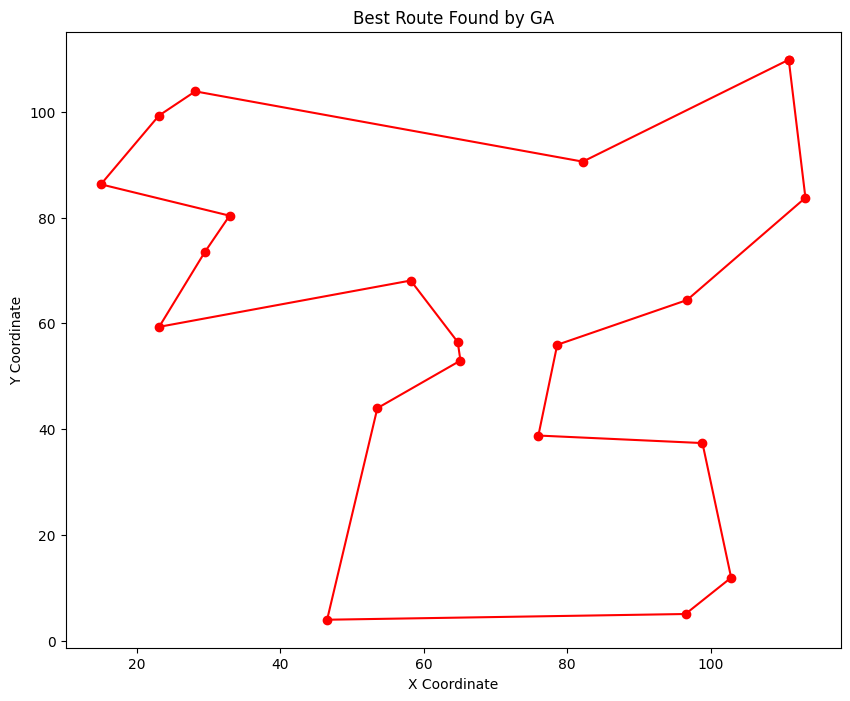

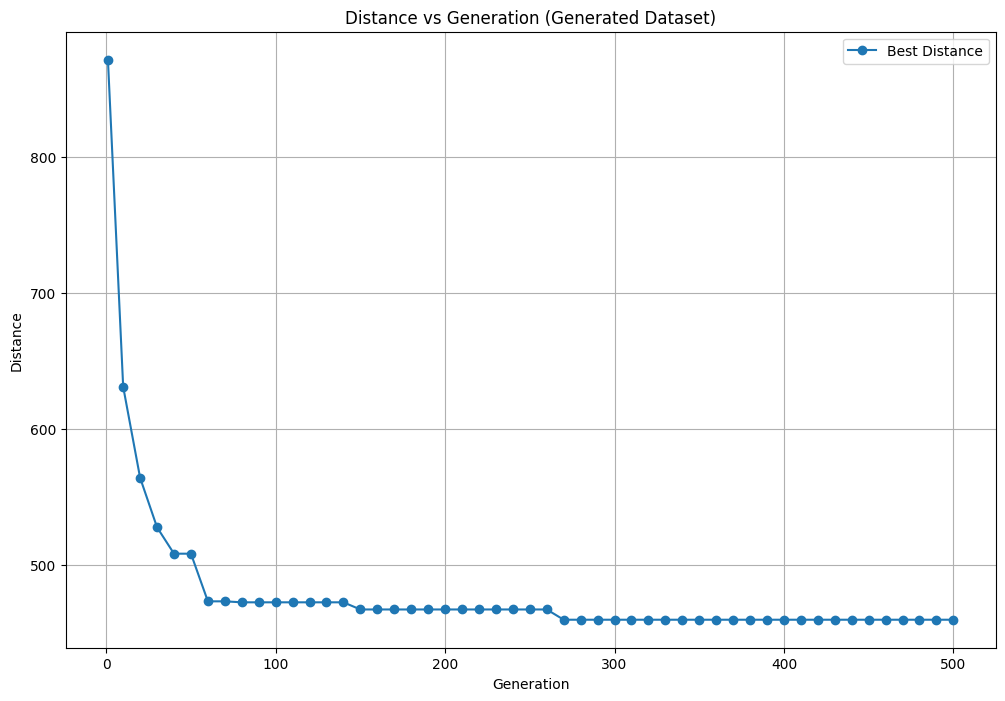

In [12]:


# Fitness function: calculate the total distance of a route
def calculate_total_distance(route, cities):
    distance = 0
    for i in range(len(route) - 1):
        city1 = cities[route[i]]
        city2 = cities[route[i + 1]]
        distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    city1 = cities[route[-1]]
    city2 = cities[route[0]]
    distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    return distance

# Initialize population with random routes
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# Selection: tournament selection
def tournament_selection(population, cities, tournament_size=3):
    tournament = random.sample(population, tournament_size)
    tournament = sorted(tournament, key=lambda route: calculate_total_distance(route, cities))
    return tournament[0]

# Order crossover (OX) operator
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    offspring = [-1] * size
    offspring[start:end] = parent1[start:end]
    current_pos = end
    for city in parent2:
        if city not in offspring:
            if current_pos == size:
                current_pos = 0
            offspring[current_pos] = city
            current_pos += 1
    return offspring

# Mutation: swap mutation
def swap_mutation(route):
    idx1, idx2 = random.sample(range(len(route)), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]

# Main Genetic Algorithm function
def genetic_algorithm(cities, pop_size=100, generations=500, mutation_rate=0.05, tournament_size=3):
    num_cities = len(cities)
    population = initialize_population(pop_size, num_cities)
    best_route = min(population, key=lambda route: calculate_total_distance(route, cities))
    result_summary = []

    for gen in range(1, generations + 1):
        new_population = []
        new_population.append(best_route)
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, cities, tournament_size)
            parent2 = tournament_selection(population, cities, tournament_size)
            offspring = order_crossover(parent1, parent2)
            if random.random() < mutation_rate:
                swap_mutation(offspring)
            new_population.append(offspring)
        population = new_population
        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, cities))
        best_route = best_route_in_pop

        if gen == 1 or gen % 10 == 0:
            distance = calculate_total_distance(best_route, cities)
            print(f"Generation {gen}: Best Distance = {distance}")
            result_summary.append((gen, distance))

    return best_route, result_summary

# Plot the best route
def plot_route(cities, best_route, title="Best Route Found by GA"):
    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Plot Distance vs Generation
def plot_distance_vs_generation(results, title="Distance vs Generation"):
    generations = [gen for gen, dist in results]
    distances = [dist for gen, dist in results]

    plt.figure(figsize=(12, 8))
    plt.plot(generations, distances, marker='o', label='Best Distance')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

if __name__ == "__main__":
    print("\nRunning Genetic Algorithm on the generated dataset...")
    best_route, result_summary = genetic_algorithm(cities)

    plot_route(cities, best_route, title="Best Route Found by GA")

    plot_distance_vs_generation(result_summary, title="Distance vs Generation (Generated Dataset)")


# Plot the dataset

Loading Berlin52 dataset...


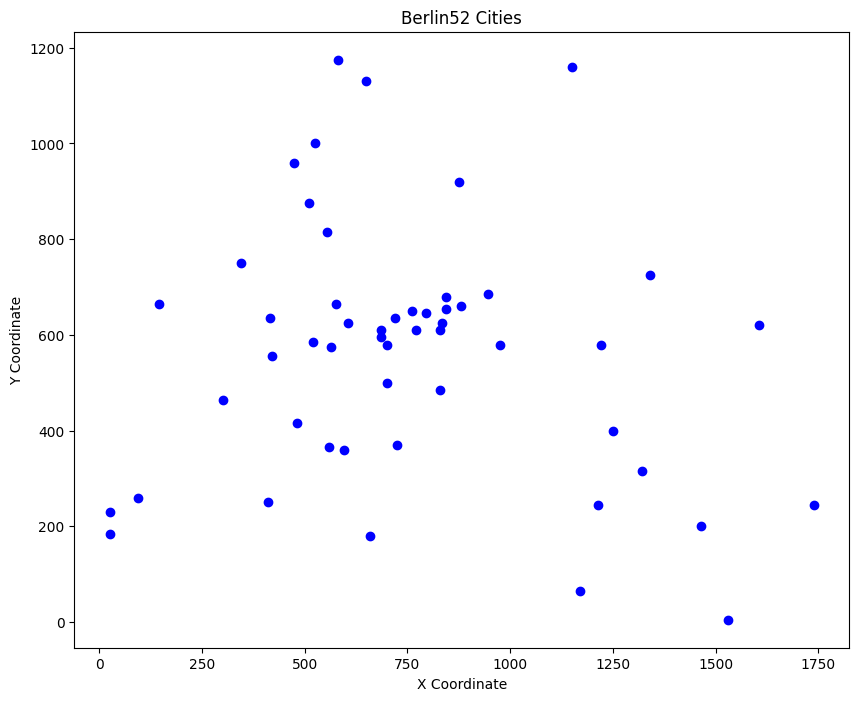

Loading Eil101 dataset...


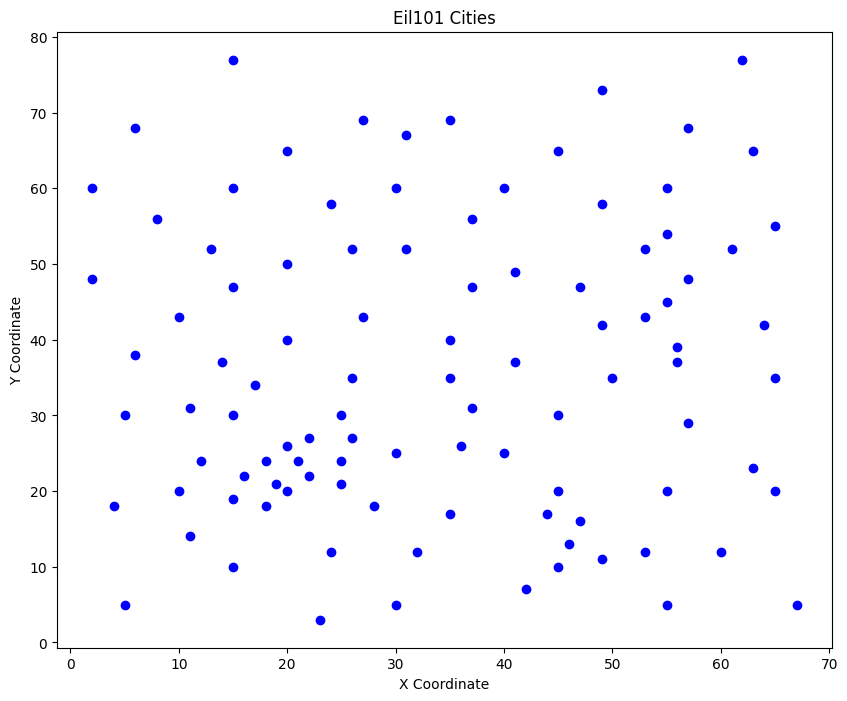

Loading St70 dataset...


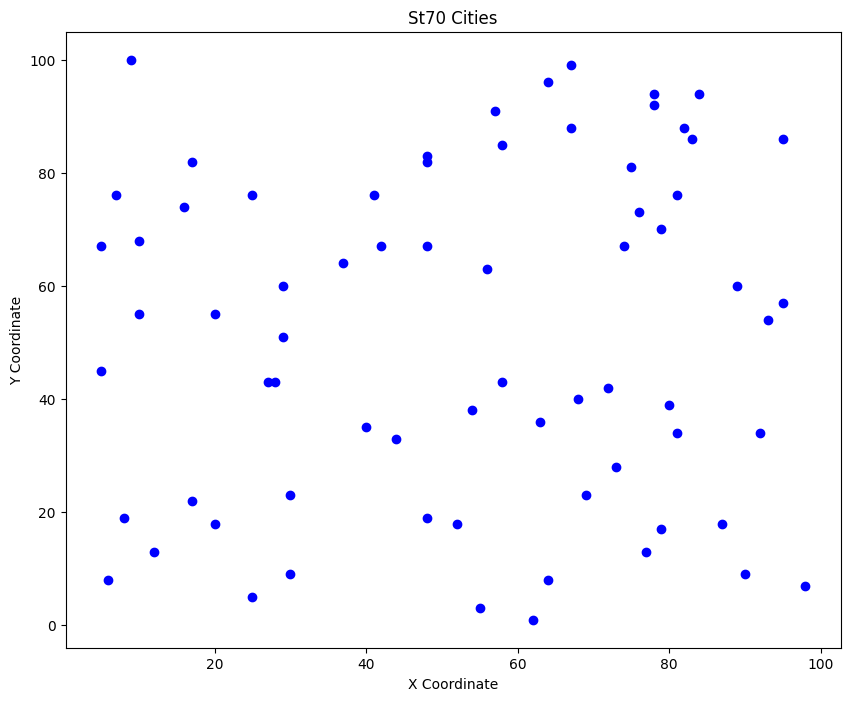

Loading Pr107 dataset...


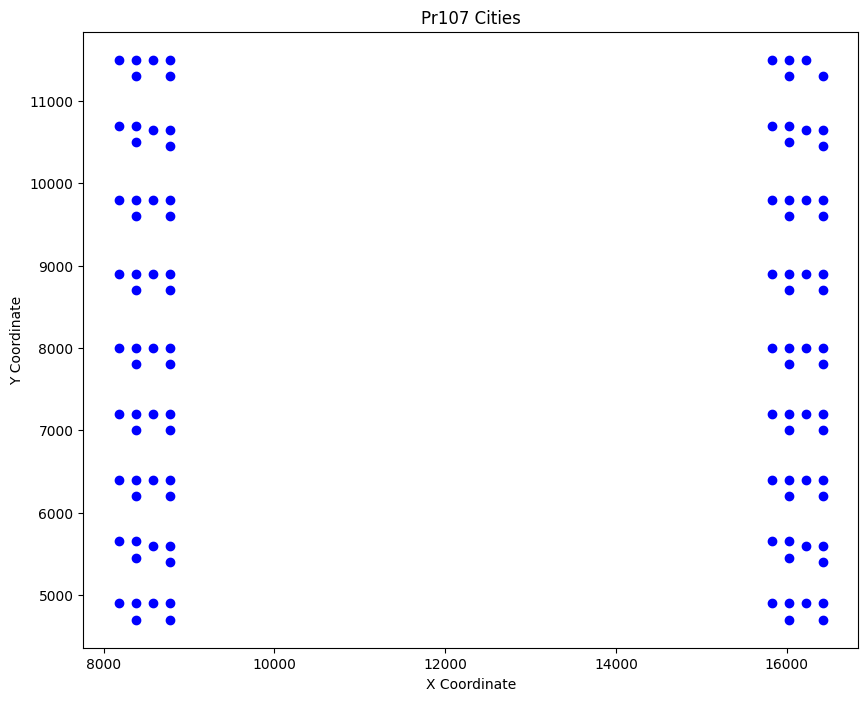

Loading Pr124 dataset...


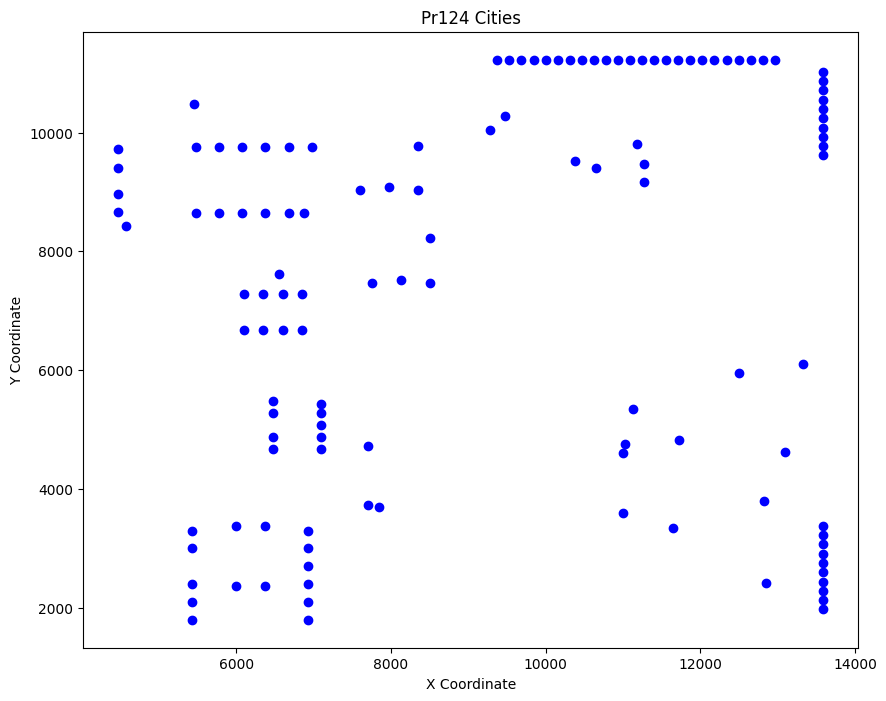

In [13]:
def load_tsp_dataset(filename):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            data = line.split()
            if len(data) == 3:
                _, x, y = data
                cities.append((float(x), float(y)))

    return cities

def plot_cities(cities, title='TSP Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    tsp_files = {
        'Berlin52': 'berlin52.tsp',
        'Eil101': 'eil101.tsp',
        'St70': 'st70.tsp',
        'Pr107': 'pr107.tsp',
        'Pr124': 'pr124.tsp'
    }

    for name, file in tsp_files.items():
        try:
            print(f"Loading {name} dataset...")
            cities = load_tsp_dataset(file)
            plot_cities(cities, title=f'{name} Cities')
        except FileNotFoundError:
            print(f"File {file} not found.")



Running Genetic Algorithm on Berlin52 dataset...
Generation 1: Best Distance = 25908.657816362695
Generation 10: Best Distance = 21057.928653353436
Generation 20: Best Distance = 18644.72706059845
Generation 30: Best Distance = 17862.267044133096
Generation 40: Best Distance = 16102.488825798971
Generation 50: Best Distance = 15693.912009916286
Generation 60: Best Distance = 15018.712878287979
Generation 70: Best Distance = 14117.460250691518
Generation 80: Best Distance = 13610.388571732688
Generation 90: Best Distance = 13200.912357926552
Generation 100: Best Distance = 12408.072436329368
Generation 110: Best Distance = 12200.60761821142
Generation 120: Best Distance = 11946.826143467937
Generation 130: Best Distance = 11946.826143467937
Generation 140: Best Distance = 11946.826143467937
Generation 150: Best Distance = 11946.826143467937
Generation 160: Best Distance = 11946.826143467937
Generation 170: Best Distance = 11946.826143467937
Generation 180: Best Distance = 11492.4188049

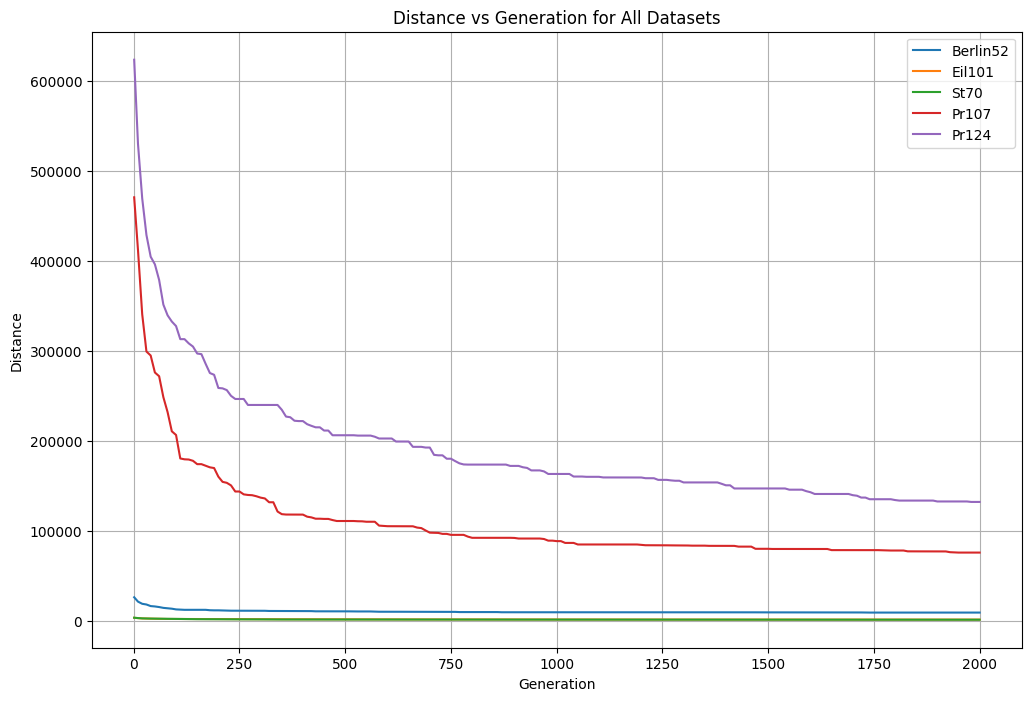

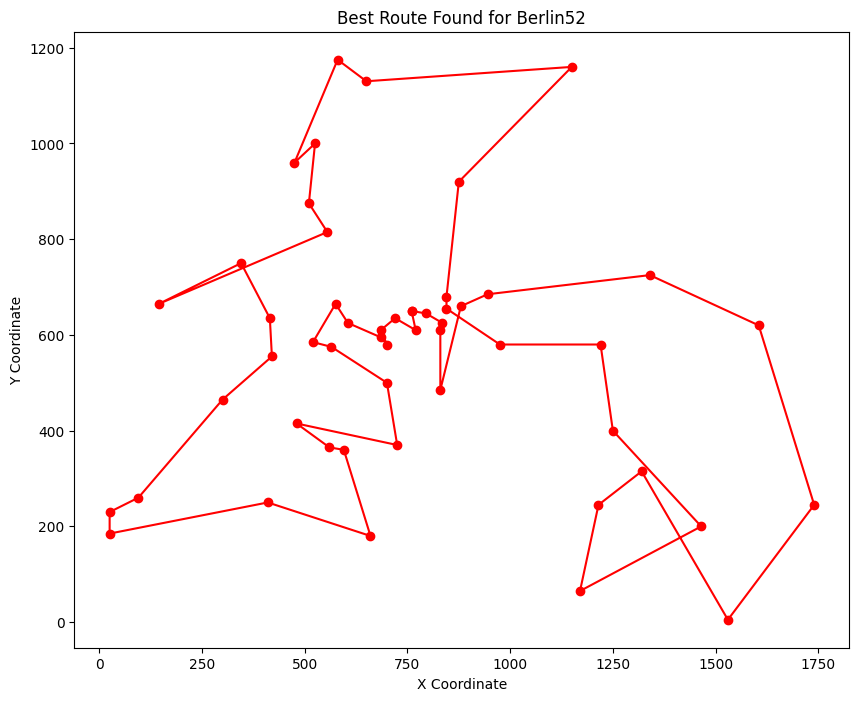

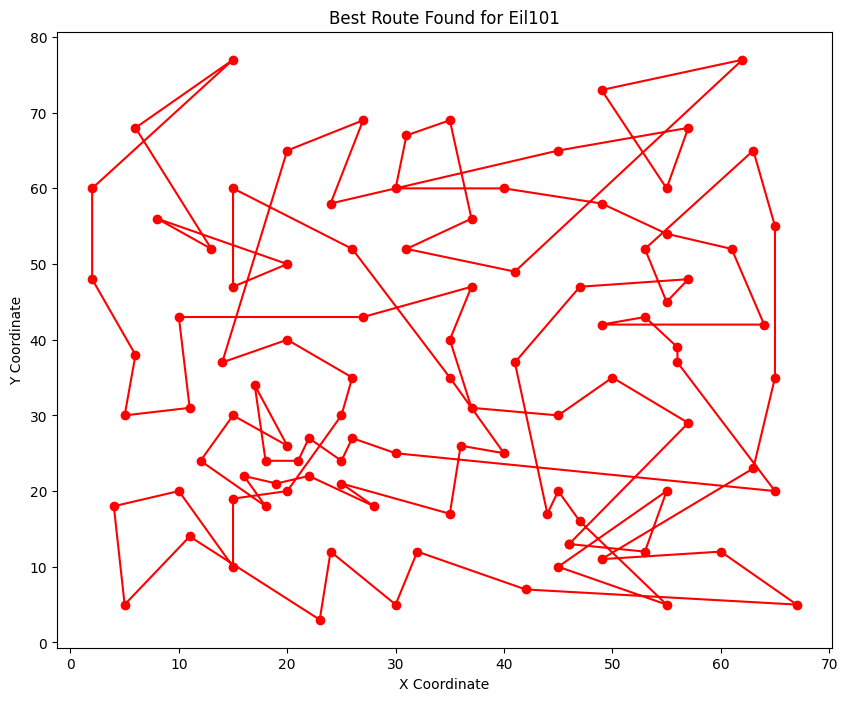

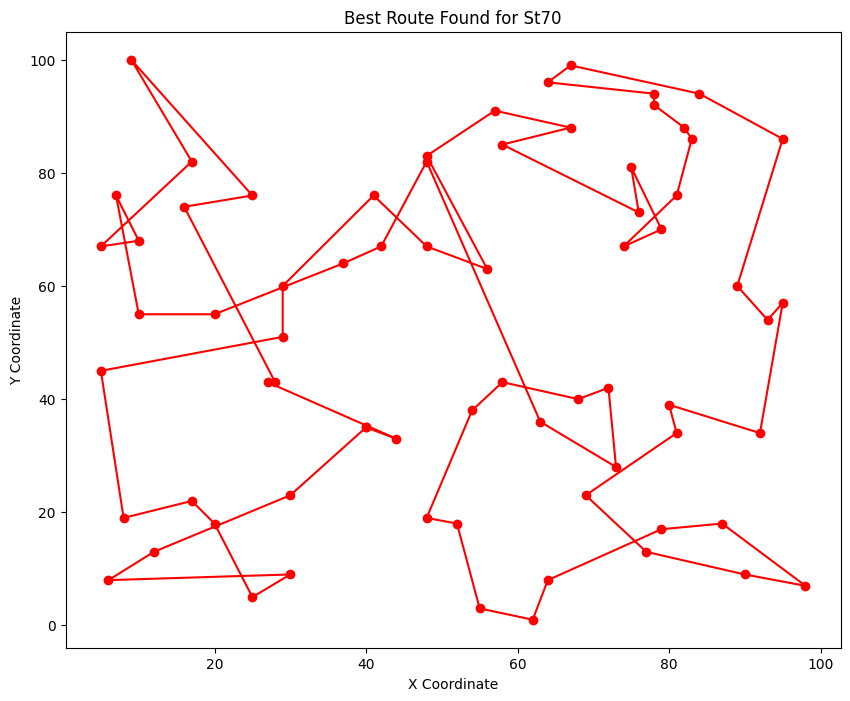

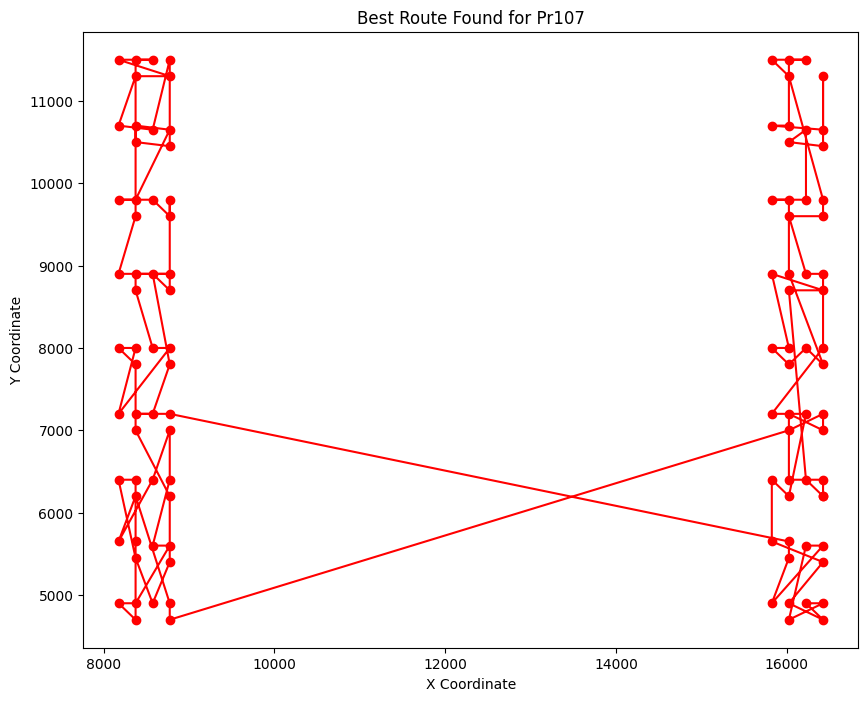

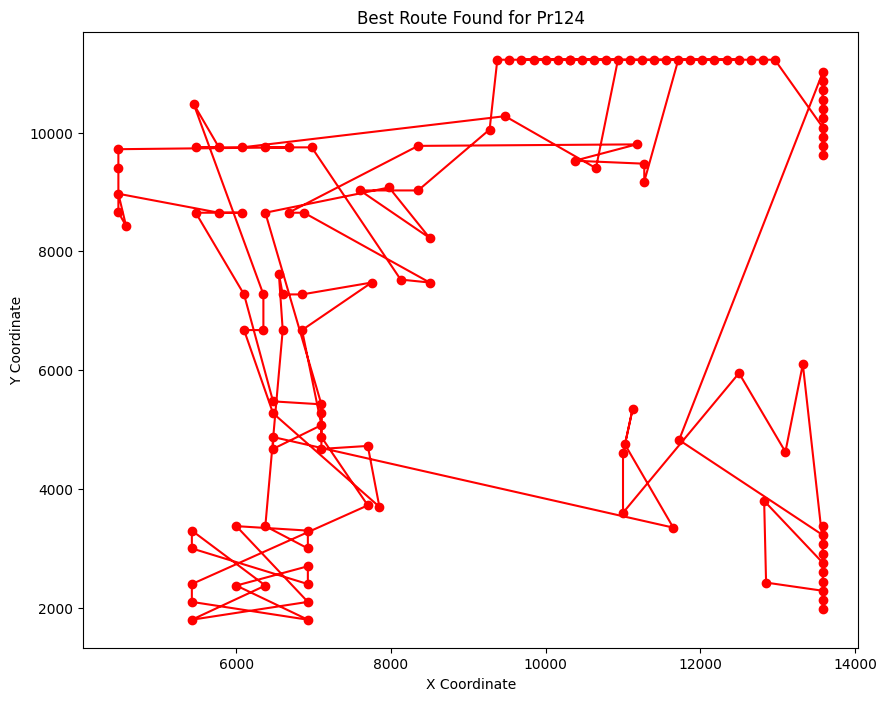


Final Results Summary:
Berlin52: Final Generation 2000, Best Distance = 8884.35538259829
Eil101: Final Generation 2000, Best Distance = 1072.9098754783715
St70: Final Generation 2000, Best Distance = 927.8284712098564
Pr107: Final Generation 2000, Best Distance = 75644.18331533617
Pr124: Final Generation 2000, Best Distance = 131993.8622329792


In [14]:
# Main Genetic Algorithm function
def genetic_algorithm(cities, pop_size=100, generations=2000, mutation_rate=0.05, tournament_size=3):
    num_cities = len(cities)
    population = initialize_population(pop_size, num_cities)
    best_route = min(population, key=lambda route: calculate_total_distance(route, cities))
    result_summary = []

    for gen in range(1, generations + 1):
        new_population = []
        new_population.append(best_route)
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, cities, tournament_size)
            parent2 = tournament_selection(population, cities, tournament_size)
            offspring = order_crossover(parent1, parent2)
            if random.random() < mutation_rate:
                swap_mutation(offspring)
            new_population.append(offspring)
        population = new_population
        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, cities))
        best_route = best_route_in_pop

        if gen == 1 or gen % 10 == 0:
            distance = calculate_total_distance(best_route, cities)
            print(f"Generation {gen}: Best Distance = {distance}")
            result_summary.append((gen, distance))

    return best_route, result_summary

def plot_route(cities, best_route, title="Best Route Found by GA"):
    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

def plot_distance_vs_generation(results, title="Distance vs Generation"):
    generations = [gen for gen, dist in results]
    distances = [dist for gen, dist in results]

    plt.figure(figsize=(12, 8))
    plt.plot(generations, distances, marker='o', label='Best Distance')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

if __name__ == "__main__":
    tsp_files = {
        'Berlin52': 'berlin52.tsp',
        'Eil101': 'eil101.tsp',
        'St70': 'st70.tsp',
        'Pr107': 'pr107.tsp',
        'Pr124': 'pr124.tsp'
    }

    final_results = {}

    for name, file in tsp_files.items():
        try:
            print(f"\nRunning Genetic Algorithm on {name} dataset...")
            cities = load_tsp_dataset(file)
            best_route, result_summary = genetic_algorithm(cities)
            final_results[name] = {
                "cities": cities,
                "best_route": best_route,
                "result_summary": result_summary
            }
            print(f"Best Route Found for {name}: {best_route}")
        except FileNotFoundError:
            print(f"Dataset {file} not found.")

    plt.figure(figsize=(12, 8))
    for name, data in final_results.items():
        result_summary = data["result_summary"]
        generations = [gen for gen, dist in result_summary]
        distances = [dist for gen, dist in result_summary]
        plt.plot(generations, distances, label=name)

    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.title('Distance vs Generation for All Datasets')
    plt.legend()
    plt.grid()
    plt.show()

    for name, data in final_results.items():
        cities = data["cities"]
        best_route = data["best_route"]
        plot_route(cities, best_route, title=f"Best Route Found for {name}")

    print("\nFinal Results Summary:")
    for name, data in final_results.items():
        final_gen, final_dist = data["result_summary"][-1]
        print(f"{name}: Final Generation {final_gen}, Best Distance = {final_dist}")


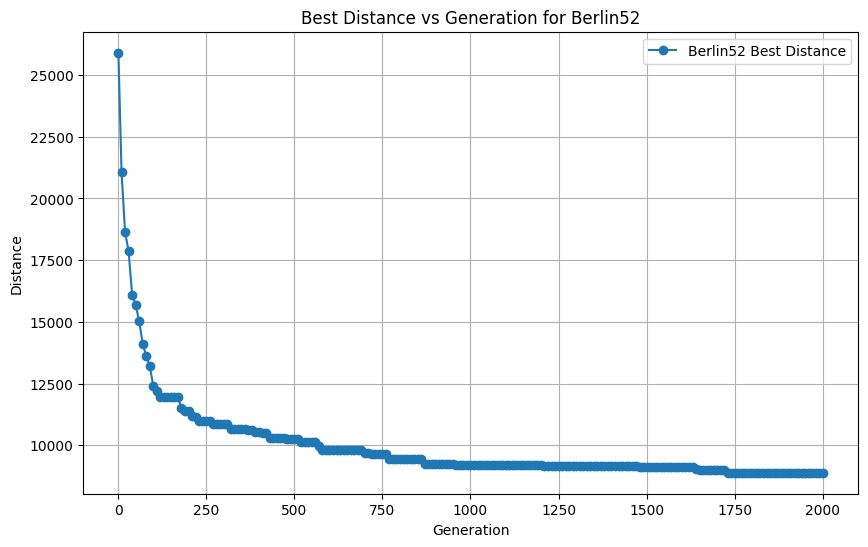

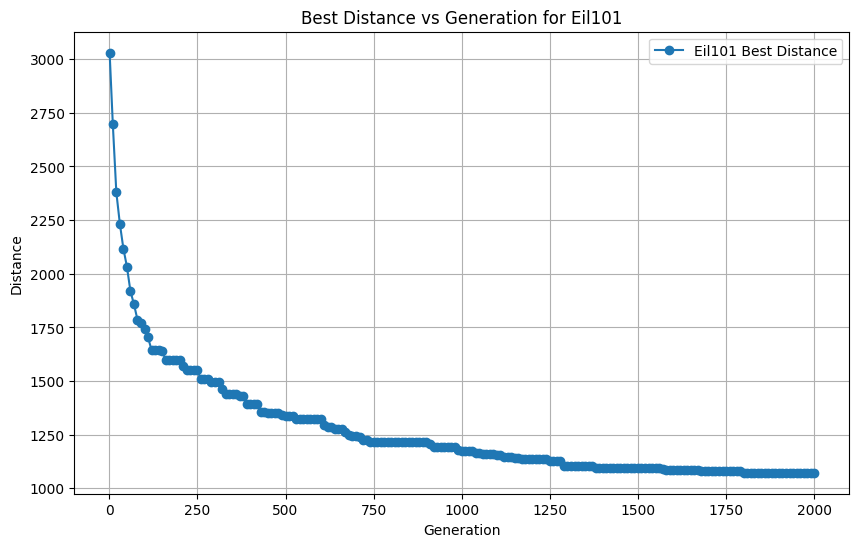

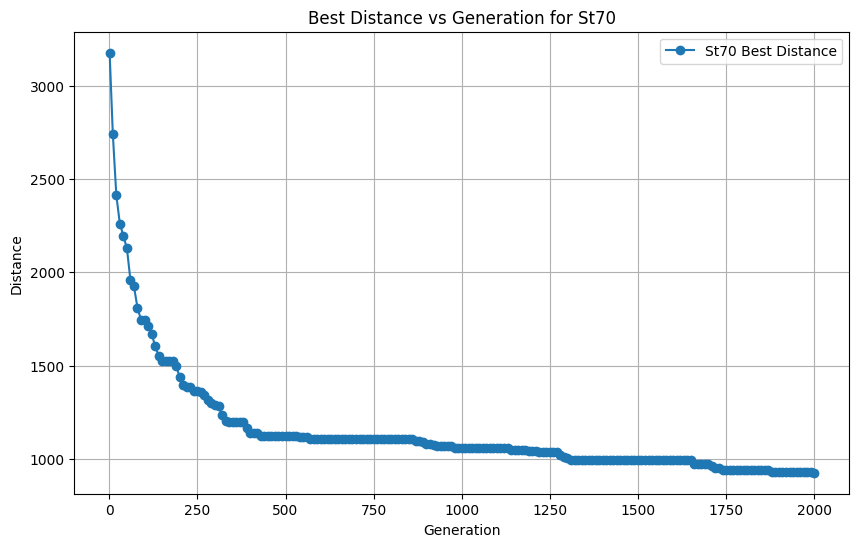

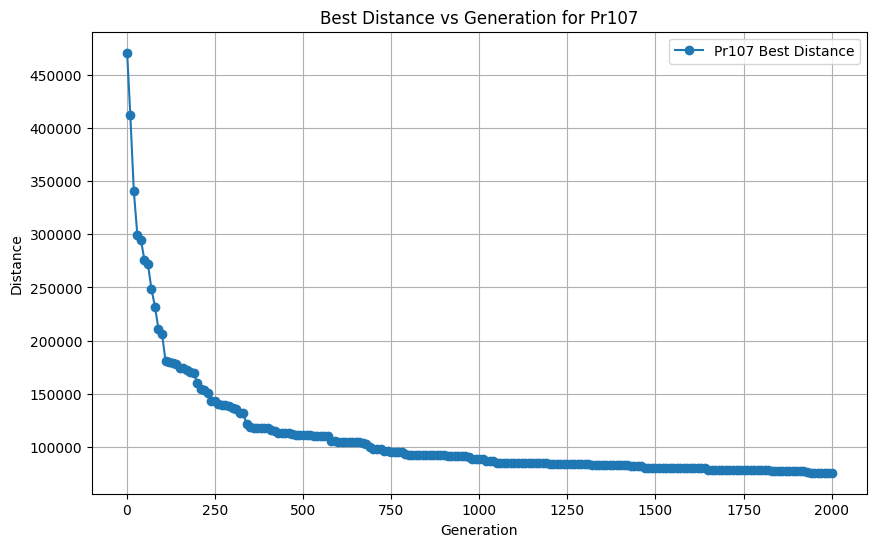

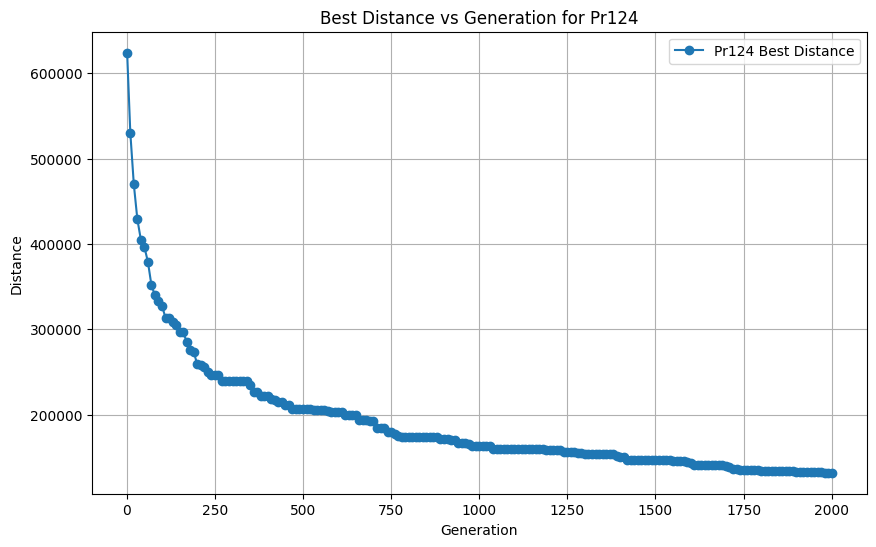

In [15]:
for name, data in final_results.items():
    result_summary = data["result_summary"]
    generations = [gen for gen, dist in result_summary]
    distances = [dist for gen, dist in result_summary]

    plt.figure(figsize=(10, 6))
    plt.plot(generations, distances, marker='o', label=f"{name} Best Distance")
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.title(f'Best Distance vs Generation for {name}')
    plt.legend()
    plt.grid()
    plt.show()


Updated GA

In [16]:
# Fitness function using a precomputed distance matrix
def calculate_total_distance(route, distance_matrix):
    distance = sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
    distance += distance_matrix[route[-1], route[0]]
    return distance

def calculate_distance_matrix(cities):
    num_cities = len(cities)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            dist_matrix[i, j] = np.linalg.norm(np.array(cities[i]) - np.array(cities[j]))
    return dist_matrix

def initialize_population(cities, pop_size, dr_fraction=0.3):
    num_cities = len(cities)
    num_greedy = int(pop_size * dr_fraction)
    population = []

    def nearest_neighbor_route(start_city):
        unvisited = list(range(num_cities))
        unvisited.remove(start_city)
        route = [start_city]
        while unvisited:
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(np.array(cities[route[-1]]) - np.array(cities[city])))
            route.append(nearest_city)
            unvisited.remove(nearest_city)
        return route

    for _ in range(num_greedy):
        start_city = random.randint(0, num_cities - 1)
        population.append(nearest_neighbor_route(start_city))

    for _ in range(pop_size - num_greedy):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)

    return population

# Calculate population diversity
def calculate_diversity(population):
    unique_routes = set(tuple(route) for route in population)
    return len(unique_routes) / len(population)

# Rank-based selection
def rank_based_selection(population, distance_matrix):
    fitness = [(route, 1 / calculate_total_distance(route, distance_matrix)) for route in population]
    fitness.sort(key=lambda x: x[1], reverse=True)
    ranks = np.arange(len(fitness), 0, -1)
    probabilities = ranks / ranks.sum()
    selected_index = np.random.choice(len(population), p=probabilities)
    return fitness[selected_index][0]

# Partially Matched Crossover (PMX)
def pmx_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size

    child[start:end] = parent1[start:end]

    for i in range(start, end):
        if parent2[i] not in child:
            idx = i
            while child[idx] != -1:
                idx = parent2.index(parent1[idx])
            child[idx] = parent2[i]

    for i in range(size):
        if child[i] == -1:
            child[i] = parent2[i]

    return child

# 2-opt local optimization
def two_opt(route, distance_matrix):
    best_distance = calculate_total_distance(route, distance_matrix)
    best_route = route[:]
    for i in range(len(route) - 1):
        for j in range(i + 1, len(route)):
            new_route = route[:]
            new_route[i:j] = reversed(new_route[i:j])
            new_distance = calculate_total_distance(new_route, distance_matrix)
            if new_distance < best_distance:
                best_distance = new_distance
                best_route = new_route
    return best_route

# Hybrid mutation
def hybrid_mutation(route, mutation_rate=0.05):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(route)), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]
    if random.random() < mutation_rate:
        start, end = sorted(random.sample(range(len(route)), 2))
        route[start:end] = reversed(route[start:end])



In [22]:
def genetic_algorithm_updated(cities, pop_size=100, generations=1000, mutation_rate=0.01, dr_fraction=0.3, early_stop=50, elitism_rate=0.05):
    num_cities = len(cities)
    distance_matrix = calculate_distance_matrix(cities)
    population = initialize_population(cities, pop_size, dr_fraction)
    best_route = min(population, key=lambda route: calculate_total_distance(route, distance_matrix))
    best_distance = calculate_total_distance(best_route, distance_matrix)

    no_improve = 0
    best_distances = []

    for gen in range(generations):
        new_population = []

        elite_size = int(pop_size * elitism_rate)
        elite = sorted(population, key=lambda route: calculate_total_distance(route, distance_matrix))[:elite_size]
        new_population.extend(elite)

        diversity = calculate_diversity(population)
        crossover_probability = 0.9 if diversity > 0.8 else 0.6

        if no_improve >= 10:
            mutation_rate = min(mutation_rate * 1.5, 0.5)
        else:
            mutation_rate = max(mutation_rate * 0.9, 0.01)

        while len(new_population) < pop_size:
            parent1 = rank_based_selection(population, distance_matrix)
            parent2 = rank_based_selection(population, distance_matrix)
            if random.random() < crossover_probability:
                offspring = pmx_crossover(parent1, parent2)
                hybrid_mutation(offspring, mutation_rate)
                new_population.append(offspring)

        population = new_population

        for i in range(elite_size):
            population[i] = two_opt(population[i], distance_matrix)

        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, distance_matrix))
        best_distance_in_pop = calculate_total_distance(best_route_in_pop, distance_matrix)

        if best_distance_in_pop < best_distance:
            best_route, best_distance = best_route_in_pop, best_distance_in_pop
            no_improve = 0
        else:
            no_improve += 1

        best_distances.append(best_distance)

        print(f"Generation {gen}: Best Distance = {best_distance:.2f}, Diversity = {diversity:.2f}")

        if no_improve >= early_stop:
            print(f"Early stopping triggered at generation {gen}.")
            break

    return best_route, best_distance, best_distances


Generation 0: Best Distance = 7906.35, Diversity = 0.94
Generation 1: Best Distance = 7785.08, Diversity = 1.00
Generation 2: Best Distance = 7757.83, Diversity = 1.00
Generation 3: Best Distance = 7749.57, Diversity = 1.00
Generation 4: Best Distance = 7744.04, Diversity = 1.00
Generation 5: Best Distance = 7713.03, Diversity = 1.00
Generation 6: Best Distance = 7713.03, Diversity = 1.00
Generation 7: Best Distance = 7713.03, Diversity = 0.99
Generation 8: Best Distance = 7713.03, Diversity = 0.99
Generation 9: Best Distance = 7713.03, Diversity = 0.99
Generation 10: Best Distance = 7713.03, Diversity = 0.98
Generation 11: Best Distance = 7713.03, Diversity = 0.99
Generation 12: Best Distance = 7713.03, Diversity = 0.97
Generation 13: Best Distance = 7713.03, Diversity = 0.97
Generation 14: Best Distance = 7713.03, Diversity = 0.93
Generation 15: Best Distance = 7713.03, Diversity = 0.90
Generation 16: Best Distance = 7713.03, Diversity = 0.90
Generation 17: Best Distance = 7713.03, D

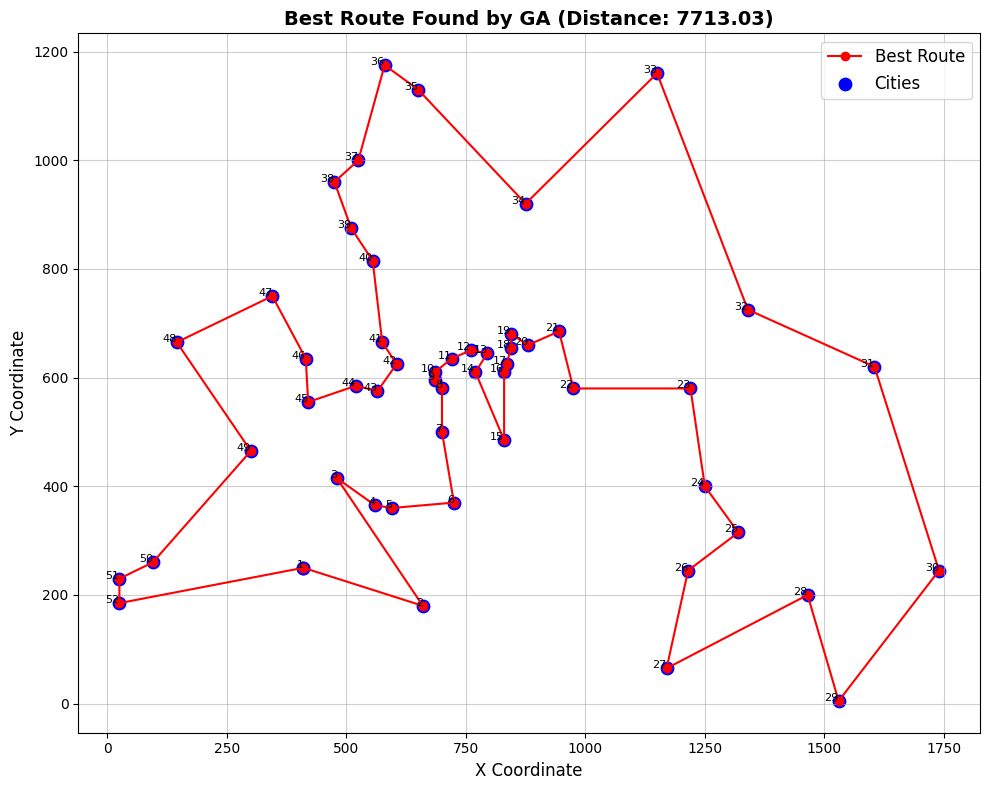

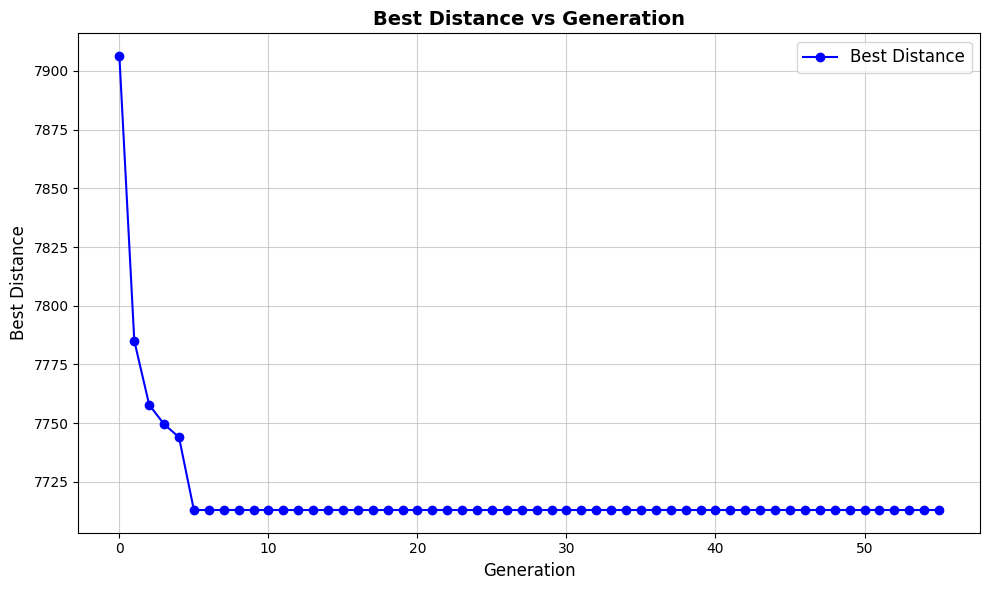

In [23]:
if __name__ == "__main__":
    cities = load_tsp_dataset('berlin52.tsp')
    best_route, best_distance, best_distances = genetic_algorithm_updated(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o', label='Best Route')
    plt.scatter(x_coords, y_coords, c='blue', s=80, label='Cities')
    for i, (x, y) in enumerate(zip(x_coords[:-1], y_coords[:-1])):
        plt.text(x, y, str(i + 1), fontsize=8, ha='right')
    plt.title(f"Best Route Found by GA (Distance: {best_distance:.2f})", fontsize=14, fontweight='bold')
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.tight_layout()
    plt.show()

    generations = list(range(len(best_distances)))

    plt.figure(figsize=(10, 6))
    plt.plot(generations, best_distances, marker='o', color='blue', label='Best Distance')
    plt.title('Best Distance vs Generation', fontsize=14, fontweight='bold')
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Distance', fontsize=12)
    plt.grid(alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


Generation 0: Best Distance = 727.15, Diversity = 0.95
Generation 1: Best Distance = 718.90, Diversity = 1.00
Generation 2: Best Distance = 710.93, Diversity = 1.00
Generation 3: Best Distance = 702.96, Diversity = 1.00
Generation 4: Best Distance = 696.58, Diversity = 1.00
Generation 5: Best Distance = 690.73, Diversity = 1.00
Generation 6: Best Distance = 685.11, Diversity = 1.00
Generation 7: Best Distance = 679.98, Diversity = 1.00
Generation 8: Best Distance = 677.17, Diversity = 1.00
Generation 9: Best Distance = 674.46, Diversity = 1.00
Generation 10: Best Distance = 672.14, Diversity = 1.00
Generation 11: Best Distance = 664.43, Diversity = 1.00
Generation 12: Best Distance = 662.13, Diversity = 1.00
Generation 13: Best Distance = 660.86, Diversity = 1.00
Generation 14: Best Distance = 659.62, Diversity = 1.00
Generation 15: Best Distance = 659.06, Diversity = 1.00
Generation 16: Best Distance = 658.75, Diversity = 0.99
Generation 17: Best Distance = 658.75, Diversity = 0.98
Ge

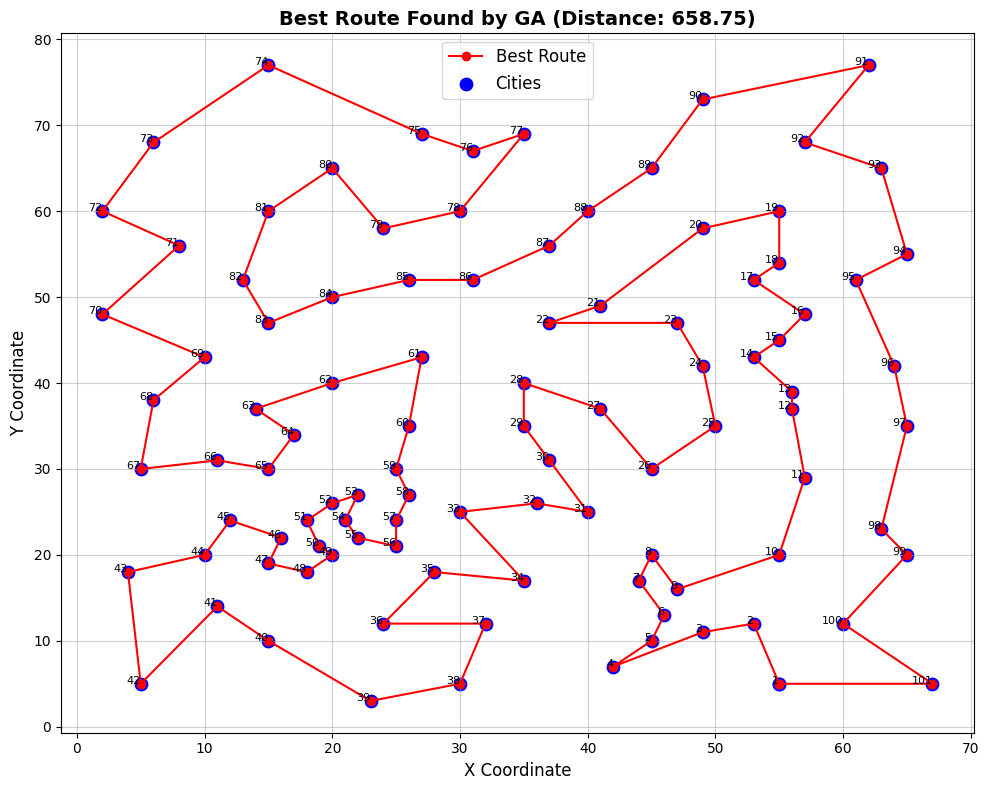

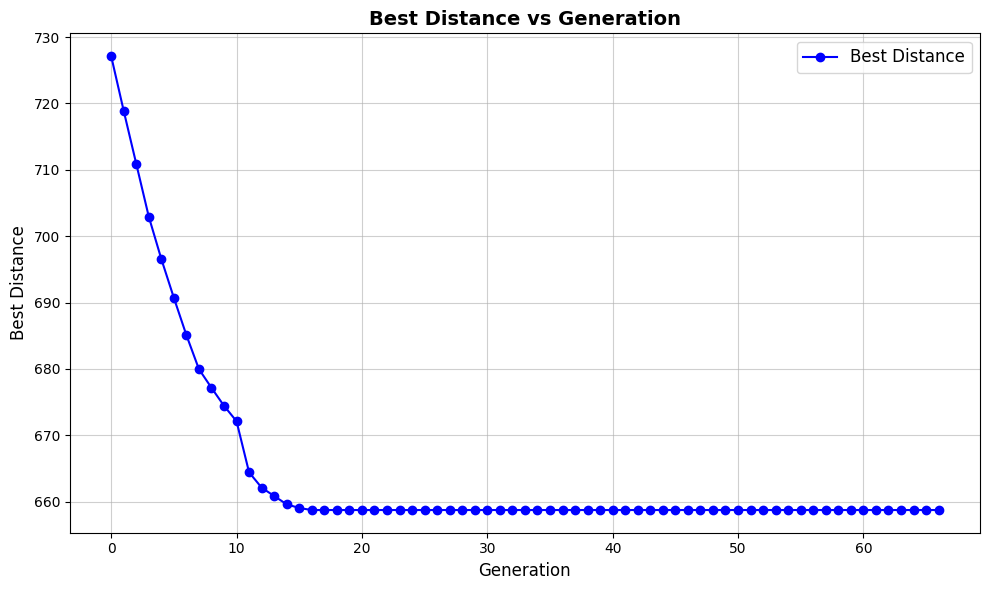

In [24]:
if __name__ == "__main__":
    cities = load_tsp_dataset('eil101.tsp')
    best_route, best_distance, best_distances = genetic_algorithm_updated(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o', label='Best Route')
    plt.scatter(x_coords, y_coords, c='blue', s=80, label='Cities')
    for i, (x, y) in enumerate(zip(x_coords[:-1], y_coords[:-1])):
        plt.text(x, y, str(i + 1), fontsize=8, ha='right')
    plt.title(f"Best Route Found by GA (Distance: {best_distance:.2f})", fontsize=14, fontweight='bold')
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.tight_layout()
    plt.show()

    generations = list(range(len(best_distances)))

    plt.figure(figsize=(10, 6))
    plt.plot(generations, best_distances, marker='o', color='blue', label='Best Distance')
    plt.title('Best Distance vs Generation', fontsize=14, fontweight='bold')
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Distance', fontsize=12)
    plt.grid(alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


Generation 0: Best Distance = 46242.02, Diversity = 0.96
Generation 1: Best Distance = 45892.07, Diversity = 0.99
Generation 2: Best Distance = 45762.02, Diversity = 0.99
Generation 3: Best Distance = 45644.86, Diversity = 0.99
Generation 4: Best Distance = 45527.70, Diversity = 0.99
Generation 5: Best Distance = 45410.54, Diversity = 0.98
Generation 6: Best Distance = 45293.39, Diversity = 0.99
Generation 7: Best Distance = 45176.23, Diversity = 0.98
Generation 8: Best Distance = 45059.07, Diversity = 0.98
Generation 9: Best Distance = 44941.91, Diversity = 0.96
Generation 10: Best Distance = 44884.04, Diversity = 0.98
Generation 11: Best Distance = 44829.21, Diversity = 0.97
Generation 12: Best Distance = 44774.38, Diversity = 0.91
Generation 13: Best Distance = 44723.99, Diversity = 0.83
Generation 14: Best Distance = 44685.00, Diversity = 0.75
Generation 15: Best Distance = 44646.00, Diversity = 0.61
Generation 16: Best Distance = 44646.00, Diversity = 0.53
Generation 17: Best Dist

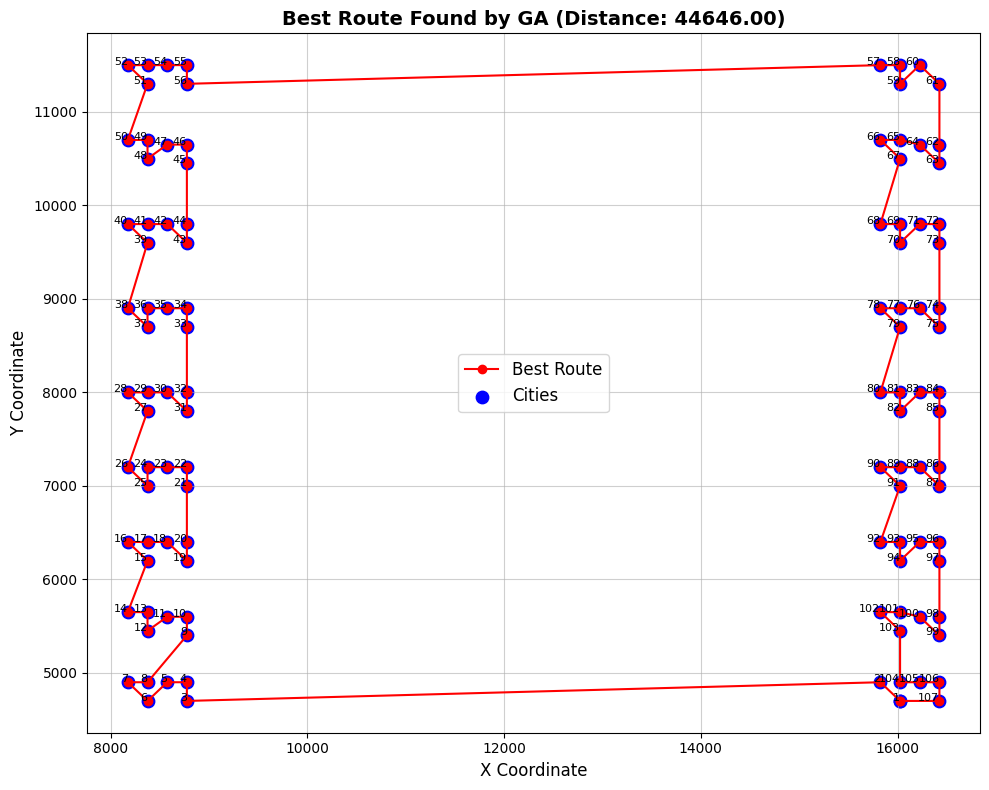

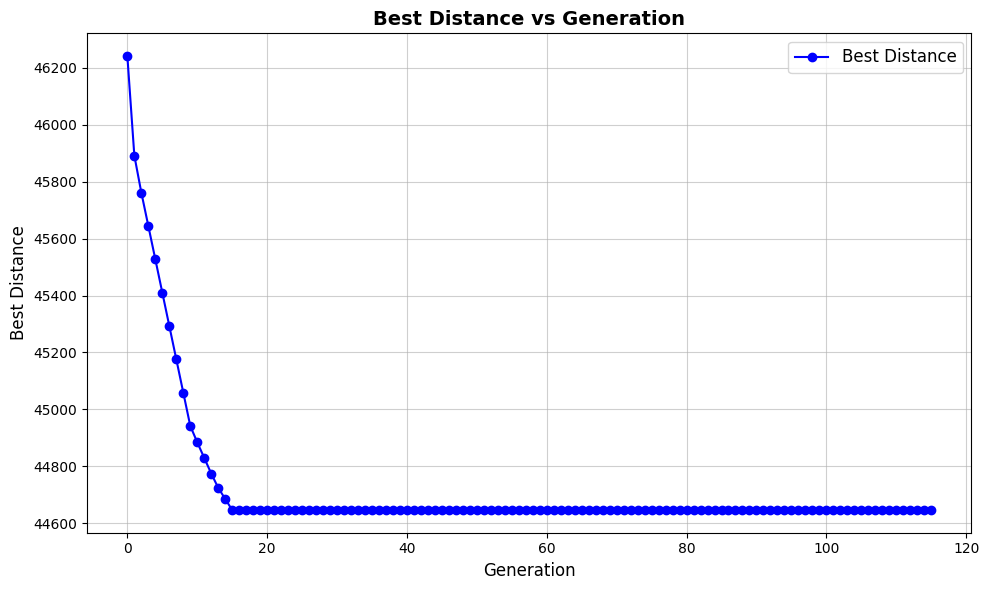

In [21]:
if __name__ == "__main__":
    cities = load_tsp_dataset('pr107.tsp')
    best_route, best_distance, best_distances = genetic_algorithm_updated(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o', label='Best Route')
    plt.scatter(x_coords, y_coords, c='blue', s=80, label='Cities')
    for i, (x, y) in enumerate(zip(x_coords[:-1], y_coords[:-1])):
        plt.text(x, y, str(i + 1), fontsize=8, ha='right')
    plt.title(f"Best Route Found by GA (Distance: {best_distance:.2f})", fontsize=14, fontweight='bold')
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.tight_layout()
    plt.show()

    generations = list(range(len(best_distances)))

    plt.figure(figsize=(10, 6))
    plt.plot(generations, best_distances, marker='o', color='blue', label='Best Distance')
    plt.title('Best Distance vs Generation', fontsize=14, fontweight='bold')
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Distance', fontsize=12)
    plt.grid(alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


Generation 0: Best Distance = 64039.20, Diversity = 0.98
Generation 1: Best Distance = 62951.58, Diversity = 0.99
Generation 2: Best Distance = 62515.07, Diversity = 1.00
Generation 3: Best Distance = 62114.94, Diversity = 1.00
Generation 4: Best Distance = 61733.48, Diversity = 1.00
Generation 5: Best Distance = 61371.11, Diversity = 1.00
Generation 6: Best Distance = 61073.04, Diversity = 1.00
Generation 7: Best Distance = 60798.36, Diversity = 0.99
Generation 8: Best Distance = 60542.74, Diversity = 0.99
Generation 9: Best Distance = 60326.20, Diversity = 0.99
Generation 10: Best Distance = 60173.80, Diversity = 0.99
Generation 11: Best Distance = 60076.84, Diversity = 0.99
Generation 12: Best Distance = 59990.48, Diversity = 0.98
Generation 13: Best Distance = 59990.48, Diversity = 0.97
Generation 14: Best Distance = 59990.48, Diversity = 0.96
Generation 15: Best Distance = 59990.48, Diversity = 0.95
Generation 16: Best Distance = 59990.48, Diversity = 0.91
Generation 17: Best Dist

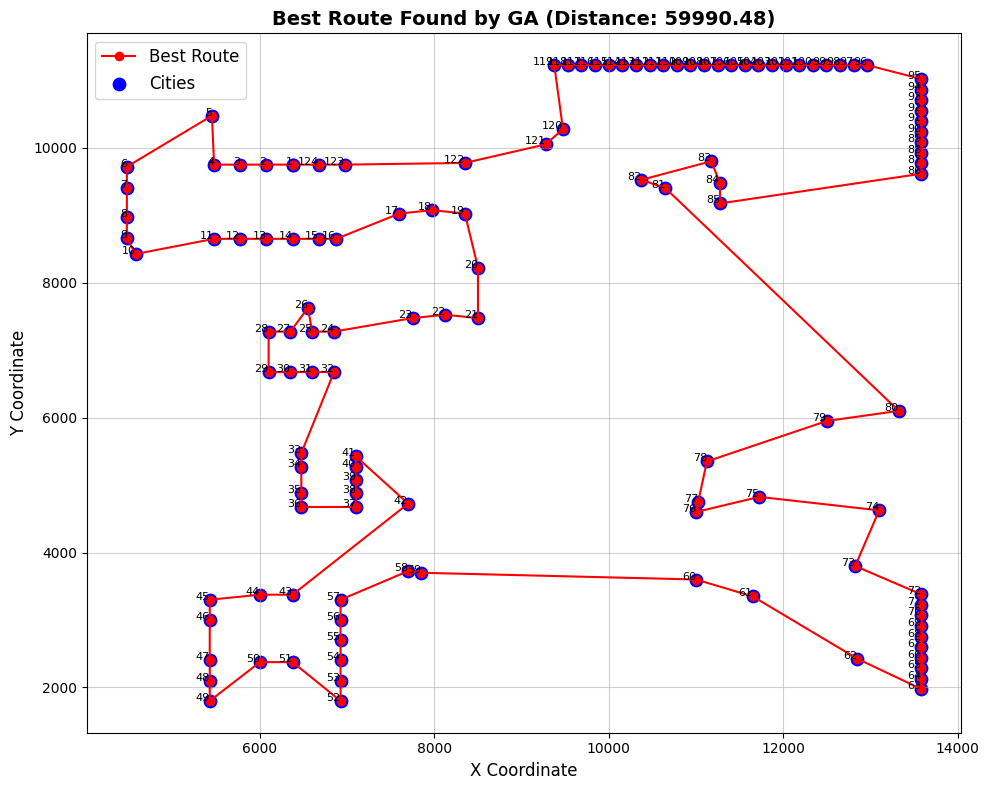

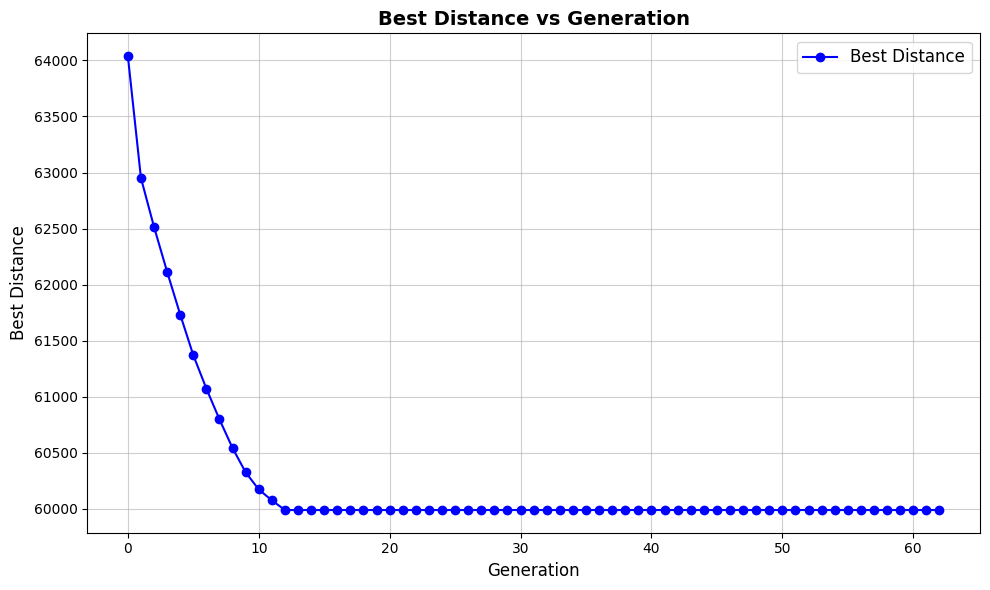

In [25]:
if __name__ == "__main__":
    cities = load_tsp_dataset('pr124.tsp')
    best_route, best_distance, best_distances = genetic_algorithm_updated(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o', label='Best Route')
    plt.scatter(x_coords, y_coords, c='blue', s=80, label='Cities')
    for i, (x, y) in enumerate(zip(x_coords[:-1], y_coords[:-1])):
        plt.text(x, y, str(i + 1), fontsize=8, ha='right')
    plt.title(f"Best Route Found by GA (Distance: {best_distance:.2f})", fontsize=14, fontweight='bold')
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.tight_layout()
    plt.show()

    generations = list(range(len(best_distances)))

    plt.figure(figsize=(10, 6))
    plt.plot(generations, best_distances, marker='o', color='blue', label='Best Distance')
    plt.title('Best Distance vs Generation', fontsize=14, fontweight='bold')
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Distance', fontsize=12)
    plt.grid(alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


Generation 0: Best Distance = 745.00, Diversity = 0.95
Generation 1: Best Distance = 733.24, Diversity = 1.00
Generation 2: Best Distance = 724.37, Diversity = 0.99
Generation 3: Best Distance = 715.65, Diversity = 1.00
Generation 4: Best Distance = 713.68, Diversity = 1.00
Generation 5: Best Distance = 711.93, Diversity = 1.00
Generation 6: Best Distance = 710.96, Diversity = 0.99
Generation 7: Best Distance = 710.27, Diversity = 0.99
Generation 8: Best Distance = 710.27, Diversity = 0.99
Generation 9: Best Distance = 710.27, Diversity = 0.96
Generation 10: Best Distance = 710.27, Diversity = 0.96
Generation 11: Best Distance = 710.27, Diversity = 0.97
Generation 12: Best Distance = 710.27, Diversity = 0.93
Generation 13: Best Distance = 710.27, Diversity = 0.89
Generation 14: Best Distance = 710.27, Diversity = 0.89
Generation 15: Best Distance = 710.27, Diversity = 0.93
Generation 16: Best Distance = 710.27, Diversity = 0.86
Generation 17: Best Distance = 710.27, Diversity = 0.86
Ge

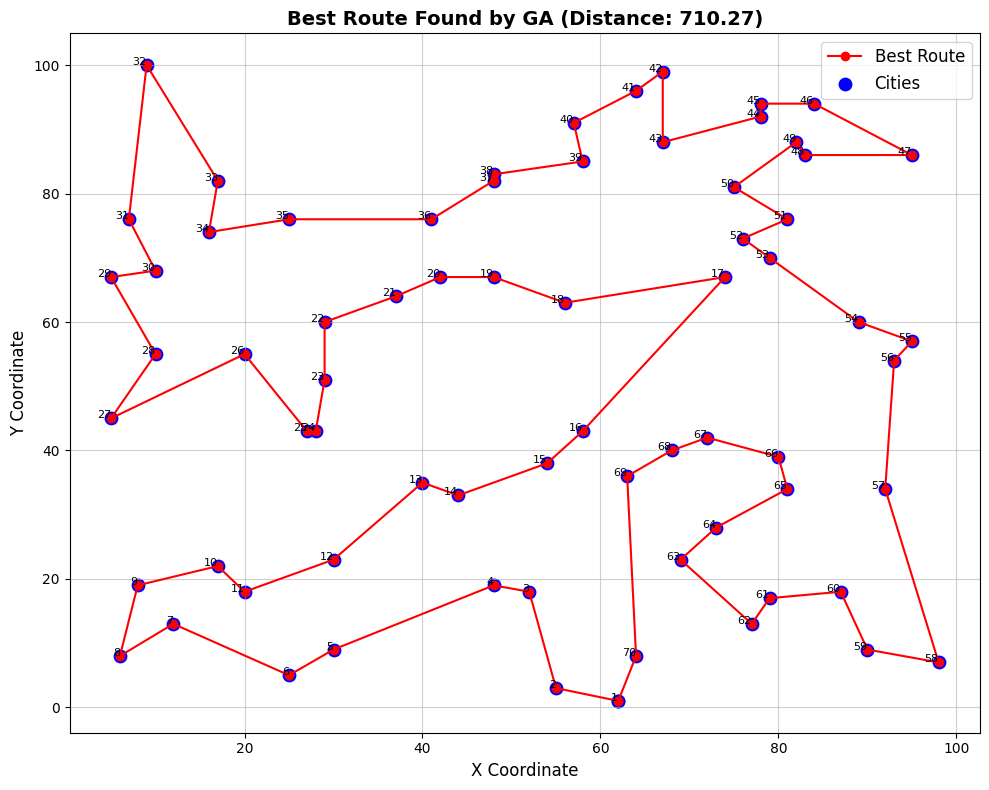

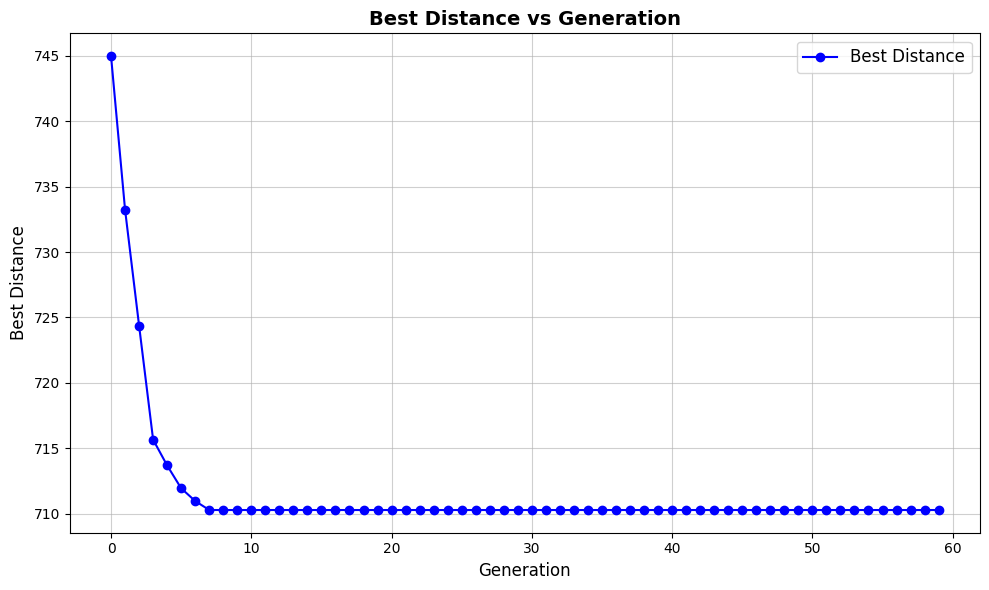

In [26]:
if __name__ == "__main__":
    cities = load_tsp_dataset('st70.tsp')
    best_route, best_distance, best_distances = genetic_algorithm_updated(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o', label='Best Route')
    plt.scatter(x_coords, y_coords, c='blue', s=80, label='Cities')
    for i, (x, y) in enumerate(zip(x_coords[:-1], y_coords[:-1])):
        plt.text(x, y, str(i + 1), fontsize=8, ha='right')
    plt.title(f"Best Route Found by GA (Distance: {best_distance:.2f})", fontsize=14, fontweight='bold')
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.tight_layout()
    plt.show()

    generations = list(range(len(best_distances)))

    plt.figure(figsize=(10, 6))
    plt.plot(generations, best_distances, marker='o', color='blue', label='Best Distance')
    plt.title('Best Distance vs Generation', fontsize=14, fontweight='bold')
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Distance', fontsize=12)
    plt.grid(alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
